### 1. Presentación

In [1]:
# Importamos todas las librerías que se necesitan.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms, plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot, grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu

In [2]:
# Creamos el dataframe de Real Estate y lo mostramos.
df_RE=pd.read_csv("../data/RealEstate_Sales_2001-2020.csv")
df_RE

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,Nan,1
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family,0
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo,1
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family,1
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family,1
...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,6/24/2020,New London,4 BISHOP CT,60410,53100.0,1.137665,Single Family,Single Family,1
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280,76000.0,0.898400,Single Family,Single Family,0
997210,190129,2019,4/27/2020,Windsor Locks,19 HATHAWAY ST,121450,210000.0,0.578300,Single Family,Single Family,1
997211,190504,2019,6/3/2020,Middletown,8 BYSTREK DR,203360,280000.0,0.726300,Single Family,Single Family,1


In [3]:
# Antes de empezar, realizamos una copia de DF y lo guardamos como backup en un DF distinto.
df_RE_backup=df_RE.copy()

In [4]:
# Revisamos el DF y vemos que no hay nulos además de los tipos de cada variable.
df_RE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997213 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997213 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     997213 non-null  object 
 9   Residential Type  997213 non-null  object 
 10  Years until sold  997213 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.7+ MB


In [5]:
# Reasignamos la variable Date Recorded a datetime y ordenamos el DF.
df_RE["Date Recorded"]=pd.to_datetime(df_RE["Date Recorded"])
df_RE.sort_values(by="Date Recorded",inplace=True)

### 2. Revisión y limpieza

In [6]:
# Buscamos registros duplicados y vemos que no hay.
duplicados=df_RE.duplicated()
df_RE[duplicados]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold


#### Serial Number

In [7]:
# El Serial Number debería ser un indicador único para cada transacción pero vemos que hay muchas repeticiones de algunos de ellos.
df_RE["Serial Number"].value_counts()

Serial Number
10010      172
10018      172
10002      172
10003      171
10029      171
          ... 
1500885      1
1500887      1
1500884      1
1500888      1
208123       1
Name: count, Length: 83537, dtype: int64

In [8]:
# Comprobamos cuantos indicadores repetidos hay y son muchos. Así que investigamos más.
df_RE.loc[df_RE["Serial Number"].duplicated()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
109930,10002,2001,2001-10-01,New Britain,195 MANSFIELD AVE,85260,137500.0,0.620073,Nan,Nan,0
70789,10003,2001,2001-10-01,Berlin,2528 CHAMBERLAIN HWY,82800,130000.0,0.636923,Nan,Nan,0
96260,10001,2001,2001-10-01,Coventry,144 BUENA VISTA RD,55860,100000.0,0.558600,Nan,Nan,0
91590,10002,2001,2001-10-01,East Windsor,361 RYE ST,70570,150000.0,0.470467,Nan,Nan,0
86330,10005,2001,2001-10-01,Cheshire,81 MAYVIEW AVE,79470,150000.0,0.529800,Nan,Nan,0
...,...,...,...,...,...,...,...,...,...,...,...
59233,200354,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1
12356,200228,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1
38896,20712,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1
5020,20000043,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1


In [9]:
# Comprobamos que los indicadores repetidos no corresponden con la misma transacción (ejemplo: 10003).
df_RE.loc[df_RE["Serial Number"]==10003]	

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
76429,10003,2001,2001-10-01,Avon,26 OAKENGATE LN,287990,455000.0,0.632945,Nan,Nan,0
70789,10003,2001,2001-10-01,Berlin,2528 CHAMBERLAIN HWY,82800,130000.0,0.636923,Nan,Nan,0
122165,10003,2001,2001-10-01,North Haven,90 CULVER LN,118440,211000.0,0.561327,Nan,Nan,0
80091,10003,2001,2001-10-01,Brooklyn,250 HERRICK RD,73670,127900.0,0.575997,Nan,Nan,0
84005,10003,2001,2001-10-01,Burlington,24 DANIEL TRACE,326620,485000.0,0.673443,Nan,Nan,0
...,...,...,...,...,...,...,...,...,...,...,...
546107,10003,2010,2010-11-16,Eastford,ASHFORD RD,55200,40000.0,1.380000,Nan,Nan,0
582996,10003,2010,2010-11-16,Hampton,259 SO BIGELOW RD,302090,355000.0,0.850958,Single Family,Single Family,0
67439,10003,2010,2010-11-30,Hartland,PELL RD,80330,125900.0,0.638046,Nan,Nan,0
590703,10003,2010,2010-12-14,Chaplin,63 CHAPPELL ST,117900,150000.0,0.786000,Single Family,Single Family,0


In [10]:
# Comprobamos que los indicadores repetidos no corresponden con la misma transacción (ejemplo: 2000807).
df_RE.loc[df_RE["Serial Number"]==2000807]	

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
47544,2000807,2020,2021-01-15,Stamford,93 GLENBROOK ROAD #102,122160,72000000.0,0.0016,Residential,Condo,1
46420,2000807,2020,2021-09-30,Naugatuck,226 MAPLE ST,211660,370000.0,0.5720,Apartments,Nan,1


In [11]:
# Dado que la columna Serial Number no aporta la información necesaria, la eliminamos.
df_RE.drop("Serial Number",axis=1,inplace=True)
df_RE

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
857911,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690,95000.0,0.491400,Condo,Condo,-18
878446,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810,635000.0,0.615449,Single Family,Single Family,-16
882211,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910,558000.0,0.766864,Single Family,Single Family,-16
389700,2006,2001-09-04,Newington,110 MOYLAN CT,64750,88000.0,0.735795,Condo,Condo,-5
430204,2006,2001-09-05,Newington,48 EVERGREEN RD,166110,256000.0,0.648867,Single Family,Single Family,-5
...,...,...,...,...,...,...,...,...,...,...
59233,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1
12356,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1
38896,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1
5020,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1


#### List Year

In [12]:
# Revisamos los valores de la columna List Year y pertenecen al periodo a estudiar (2001-2020).
df_RE["List Year"].value_counts()

List Year
2004    84056
2020    66592
2003    64239
2005    61602
2002    59682
2001    59584
2019    58954
2018    50709
2016    49773
2014    49563
2006    48785
2015    46651
2017    45691
2009    42508
2013    39943
2012    35973
2007    35617
2010    33491
2008    32735
2011    31065
Name: count, dtype: int64

#### Date Recorded y Recorded Year

In [13]:
# A partir de la columna Date Recorded vamos a crear una nueva columna extrayendo solo el año de dicha fecha.
df_RE["Recorded Year"] = df_RE["Date Recorded"].dt.year
df_RE

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
857911,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690,95000.0,0.491400,Condo,Condo,-18,1999
878446,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810,635000.0,0.615449,Single Family,Single Family,-16,2001
882211,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910,558000.0,0.766864,Single Family,Single Family,-16,2001
389700,2006,2001-09-04,Newington,110 MOYLAN CT,64750,88000.0,0.735795,Condo,Condo,-5,2001
430204,2006,2001-09-05,Newington,48 EVERGREEN RD,166110,256000.0,0.648867,Single Family,Single Family,-5,2001
...,...,...,...,...,...,...,...,...,...,...,...
59233,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1,2021
12356,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1,2021
38896,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1,2021
5020,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1,2021


In [14]:
# Analizando los valores de la nueva columna vemos que hay años anteriores y posteriores al periodo a analizar (2001-2020).
# El año 2001 se registra una cantidad extrañamente inferior a los años siguientes por lo que se prescinde también de los registros de ese año.
# Además hay un registro de 1999 cuando los de la columna List Year empiezan posteriormente. Resulta extraño y lo analizaremos con Years until sold.
df_RE["Recorded Year"].value_counts()

Recorded Year
2005    79566
2004    73943
2020    62534
2002    60207
2006    57250
2003    56319
2019    52622
2015    48894
2017    48493
2021    48441
2016    47611
2018    47165
2007    46138
2014    41941
2010    39128
2013    37513
2009    36305
2008    34195
2012    32568
2011    32088
2001    14291
1999        1
Name: count, dtype: int64

In [15]:
# Eliminamos los registros de las transacciones realizadas anterior o posteriormente a 2002 y 2020.
df_RE.drop(df_RE[df_RE["Recorded Year"] == 1999].index, inplace=True)
df_RE.drop(df_RE[df_RE["Recorded Year"] == 2001].index, inplace=True)
df_RE.drop(df_RE[df_RE["Recorded Year"] == 2021].index, inplace=True)

#### Years until sold

In [16]:
# Nos centramos en la columna Years until sold y buscamos los registros cuya fecha de venta es anterior a la fecha de "publicación".
df_RE[df_RE["Years until sold"]<0]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
407732,2006,2003-07-17,Naugatuck,80 GORMAN ST,84200,158900.0,0.529893,Single Family,Single Family,-3,2003
388498,2006,2004-02-26,Sharon,DOUGLAS RD,3600,5020.0,0.717131,Nan,Nan,-2,2004
414000,2006,2004-06-05,Bristol,225 TYLER WAY,147320,329900.0,0.446560,Single Family,Single Family,-2,2004
443550,2006,2004-07-27,South Windsor,305 MILL POND DR,113580,210000.0,0.540857,Condo,Condo,-2,2004
419243,2006,2004-07-31,Newington,131 STAGE COACH LN,246120,420000.0,0.586000,Single Family,Single Family,-2,2004
443976,2006,2004-08-02,Stratford,125 WARNER HL RD 27,92750,179000.0,0.518156,Condo,Condo,-2,2004
451304,2006,2004-09-12,Stratford,243 WEBER AVENUE,420,287500.0,0.001461,Nan,Nan,-2,2004
424369,2006,2004-09-24,South Windsor,2606 MILL POND DR,123520,243900.0,0.506437,Condo,Condo,-2,2004
479961,2007,2004-11-02,Westport,6 SPRUCEWOOD LANE,869600,1200000.0,0.724667,Single Family,Single Family,-3,2004
478225,2007,2005-02-05,Meriden,46 ORIENT ST,155340,264000.0,0.588409,Two Family,Two Family,-2,2005


In [17]:
# Dado que no hay manera de saber la fecha correcta (siendo un dato importante para el estudio) y el peso de los registros no es significativo, decidimos borrar esos registros.
df_RE.drop(df_RE[df_RE["Years until sold"]<0].index,inplace=True)

In [18]:
# Comprobamos que entre la columna de List Year y la nueva columna Recorded Year no se da este error.
df_RE.loc[df_RE["List Year"]>df_RE["Recorded Year"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year


In [19]:
# Creamos una nueva columna con los años entre el List Year y el Recorded Year para comprobar si hay más incongruencias con la columna Years until sold.
df_RE["Years for sale"]=df_RE["Recorded Year"]-df_RE["List Year"]

In [20]:
# Ambas columnas son iguales por lo que eliminamos la nueva varibale creada.
df_RE[df_RE["Years for sale"]!=df_RE["Years until sold"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Years for sale


In [21]:
# Eliminamos la nueva columna creada.
df_RE.drop("Years for sale", axis=1, inplace=True)

#### Town

In [22]:
#Listamos todos los towns del dataset. Vemos que hay alguno/s con valor Unknown.
towns=df_RE["Town"].unique()
towns

array(['New Britain', 'Norwich', 'Roxbury', 'East Haven', 'Bristol',
       'Woodbury', 'Stratford', 'Newtown', 'Vernon', 'Hamden',
       'West Hartford', 'Westport', 'Windsor Locks', 'Watertown',
       'Stonington', 'Wethersfield', 'Torrington', 'Manchester',
       'West Haven', 'Milford', 'Plainville', 'Bridgeport', 'Rocky Hill',
       'East Granby', 'Southbury', 'Orange', 'Preston', 'Middletown',
       'Danbury', 'Avon', 'Ridgefield', 'Plainfield', 'Branford',
       'Farmington', 'East Windsor', 'Redding', 'Suffield', 'Newington',
       'Eastford', 'Berlin', 'Ansonia', 'Waterford', 'Hartford',
       'New London', 'Willington', 'Granby', 'Clinton', 'Hartland',
       'Wilton', 'Lyme', 'Bridgewater', 'East Hampton', 'Simsbury',
       'Litchfield', 'Chester', 'Stamford', 'Naugatuck', 'Burlington',
       'Killingly', 'Oxford', 'Cromwell', 'Glastonbury', 'Thompson',
       'Sterling', 'Bethlehem', 'Putnam', 'Norfolk', 'Madison', 'Windsor',
       'Ellington', 'Durham', 'Norwalk

In [23]:
# Buscamos los registros cuyo Town es desconocido y así podemos corregirlo (por los valores de town de la misma Address y lo podemos ver también en Internet).
df_RE.loc[df_RE["Town"]=="***Unknown***"]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
444657,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007


In [24]:
#Vemos que con la misma dirección hay tres registros que hacen referencia a la misma transacción ya que tienen la misma fecha de compra y corresponden a una casa individual.
df_RE.loc[df_RE["Address"]=="18 MATHIEU LANE"]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
479214,2007,2007-12-18,East Hampton,18 MATHIEU LANE,66540,50000.0,1.330800,Nan,Nan,0,2007
444657,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007
444846,2007,2007-12-18,East Hampton,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007


In [25]:
# Al no poder determinar cual es la correcta, las eliminamos.
df_RE.drop(df_RE[df_RE["Address"] == "18 MATHIEU LANE"].index, inplace=True)

#### Address

In [26]:
# La dejamos para más tarde

#### Sale Amount 

In [27]:
# Cambiamos el nombre de la columna Sale Amount a Price
df_RE.rename(columns={"Sale Amount":"Price"},inplace=True)

In [28]:
# El precio medio es de 382.074$ pero la variable presenta una desviación estándar muy alta lo que indica una gran dispersión de los datos. 
# El precio mínimo es 0$.
# El precio máximo es de 395.500.000$ muy alejado de el 75% más caro que se sitúa en 360.000$ (por debajo de la media).
df_RE["Price"].describe()

count    9.344280e+05
mean     3.800034e+05
std      1.820167e+06
min      0.000000e+00
25%      1.399000e+05
50%      2.249000e+05
75%      3.600000e+05
max      3.955000e+08
Name: Price, dtype: float64

In [29]:
# Mostramos los 20 registros con mayor precio de venta y vemos que:
# Los nueve registros de mayor precio presentan el mismo valor y algunos de ellos con unos Sales Ratio disparados (mucha diferencia entre precio y valoración).
# Además los nueve registros pertenecen a Stamford que no destaca por se una de las ciudades con mayor coste de vida.
# El décimo precio más alto pertenece a Waterbyry (tampoco destaca entre las ciudades más caras del país) y es más de un 40% más caro que el siguiente inmueble de la lista (vendido el mismo año).
df_RE.nlargest(20,"Price")

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
801957,2016,2016-12-06,Stamford,200 HENRY STREET # 3,10829090,395500000.0,0.027381,Nan,Nan,0,2016
847108,2016,2016-12-06,Stamford,200 HENRY STREET # 1,10669060,395500000.0,0.026976,Nan,Nan,0,2016
844492,2016,2016-12-06,Stamford,200 HENRY STREET # 2,3200720,395500000.0,0.008093,Nan,Nan,0,2016
839109,2016,2016-12-06,Stamford,301-401 COMMONS PARK SOUTH # C,92447590,395500000.0,0.233749,Nan,Nan,0,2016
799639,2016,2016-12-06,Stamford,115 TOWNE STREET,50820110,395500000.0,0.128496,Nan,Nan,0,2016
845330,2016,2016-12-06,Stamford,200 HENRY STREET # 5,3307410,395500000.0,0.008363,Nan,Nan,0,2016
835231,2016,2016-12-06,Stamford,120 TOWNE STREET,56144510,395500000.0,0.141958,Nan,Nan,0,2016
847797,2016,2016-12-06,Stamford,110 TOWNE STREET,23290450,395500000.0,0.058889,Nan,Nan,0,2016
825219,2016,2016-12-06,Stamford,200 HENRY STREET # 4,10935790,395500000.0,0.027651,Nan,Nan,0,2016
993748,2019,2019-11-13,Waterbury,64 ROBBINS ST,142858700,230043624.0,0.621000,Nan,Nan,0,2019


In [30]:
# Mostramos los inmuebles en Henry Street, Stamford y parece que los precios tan elevados son erróneos ya que distan mucho de las transacciones registradas en la misma calle.
# Eliminamos los 5 registros.
df_RE.loc[(df_RE["Address"].str.contains("HENRY STREET"))&(df_RE["Town"]=="Stamford")]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
498324,2008,2008-11-20,Stamford,189 HENRY STREET,356580,282000.0,1.264468,Single Family,Single Family,0,2008
512947,2008,2009-03-30,Stamford,199 HENRY STREET,334190,170000.0,1.965824,Single Family,Single Family,1,2009
499740,2008,2009-03-30,Stamford,199 HENRY STREET,334190,170000.0,1.965824,Single Family,Single Family,1,2009
594846,2011,2012-05-23,Stamford,213 HENRY STREET,488820,320000.0,1.527562,Three Family,Three Family,1,2012
784620,2015,2015-12-30,Stamford,207 HENRY STREET,297230,700000.0,0.424614,Four Family,Four Family,0,2015
795909,2015,2016-04-11,Stamford,67 HENRY STREET,862200,214000.0,4.028972,Nan,Nan,1,2016
801957,2016,2016-12-06,Stamford,200 HENRY STREET # 3,10829090,395500000.0,0.027381,Nan,Nan,0,2016
847108,2016,2016-12-06,Stamford,200 HENRY STREET # 1,10669060,395500000.0,0.026976,Nan,Nan,0,2016
844492,2016,2016-12-06,Stamford,200 HENRY STREET # 2,3200720,395500000.0,0.008093,Nan,Nan,0,2016
845330,2016,2016-12-06,Stamford,200 HENRY STREET # 5,3307410,395500000.0,0.008363,Nan,Nan,0,2016


In [31]:
# Mostramos los inmuebles en Commons Park South y parece que el precio también es aquívoco ya que distan mucho de la otra transacción registrada en la misma calle.
# Eliminamos el registro.
df_RE.loc[df_RE["Address"].str.contains("COMMONS PARK SOUTH")]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
839109,2016,2016-12-06,Stamford,301-401 COMMONS PARK SOUTH # C,92447590,395500000.0,0.233749,Nan,Nan,0,2016
987308,2019,2019-12-26,Stamford,201 COMMONS PARK SOUTH,63630020,90000000.0,0.707000,Nan,Nan,0,2019


In [32]:
# Mostramos los inmuebles en Towne Street, y aunque no hay registros en esa calle con otros precios, el Sales Ratio es muy elevado.
# Prescindimos de los 3 registros.
df_RE.loc[df_RE["Address"].str.contains("TOWNE STREET")]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
799639,2016,2016-12-06,Stamford,115 TOWNE STREET,50820110,395500000.0,0.128496,Nan,Nan,0,2016
835231,2016,2016-12-06,Stamford,120 TOWNE STREET,56144510,395500000.0,0.141958,Nan,Nan,0,2016
847797,2016,2016-12-06,Stamford,110 TOWNE STREET,23290450,395500000.0,0.058889,Nan,Nan,0,2016


In [33]:
# El décimo máximo precio se da en Robbins Street 64, calle donde los precios van desde los 46.000 hasta los 333.522 a excepción de un bloque Robbins St 64-68 (maps: hospital) que se vendió en 2016 por casi 64.000.000.
# Por ello, eliminamos el registro.
df_RE.loc[df_RE["Address"].str.contains("ROBBINS ST")]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
246958,2003,2004-06-03,Waterbury,155 ROBBINS ST,138250,333522.0,0.414515,Nan,Nan,1,2004
265822,2003,2004-08-12,Waterbury,93 ROBBINS ST,136150,260000.0,0.523654,Nan,Nan,1,2004
256175,2003,2004-08-16,Waterbury,221-223 ROBBINS ST,97650,192500.0,0.507273,Nan,Nan,1,2004
350685,2004,2004-10-19,Waterbury,225 ROBBINS ST,115850,250000.0,0.463400,Nan,Nan,0,2004
349366,2004,2004-10-29,Waterbury,219 ROBBINS ST,112560,230000.0,0.489391,Nan,Nan,0,2004
340342,2004,2005-04-04,Waterbury,27-29 ROBBINS ST,73290,155900.0,0.470109,Nan,Nan,1,2005
302603,2004,2005-04-29,Waterbury,229-231 ROBBINS ST,88900,165000.0,0.538788,Nan,Nan,1,2005
317263,2004,2005-08-09,Waterbury,328 ROBBINS ST,79870,266100.0,0.300150,Nan,Nan,1,2005
388829,2005,2005-11-29,Waterbury,229 ROBBINS ST,88900,247000.0,0.359919,Nan,Nan,0,2005
399956,2005,2006-04-17,Waterbury,27 ROBBINS ST,79520,247000.0,0.321943,Nan,Nan,1,2006


In [34]:
df_RE.drop(df_RE.nlargest(10,"Price").index,inplace=True)

In [35]:
# Eliminamos los registros cuyo precio de venta sea 0$.
df_RE.drop(df_RE[df_RE["Price"]==0].index,inplace=True)

In [36]:
# Analizamos los registros cuyo precio es inferior a 300 y vemos que los datos no tienen sentido ya que su valoración es muy superior (importante la variable Sales Ratio) y el precio en sí ya parece extraño para cualquier tipo de inmueble. 
df_RE.loc[df_RE["Price"]<300]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
102652,2001,2002-01-24,Stamford,95 PROSPECT ST,221060,10.0,22106.000000,Nan,Nan,1,2002
164102,2002,2002-10-03,Portland,MAIN ST,0,100.0,0.000000,Nan,Nan,0,2002
131206,2002,2002-11-12,Hartford,57 GILLETT ST,165060,1.0,165060.000000,Nan,Nan,0,2002
194336,2003,2003-12-30,Brooklyn,HARTFORD RD,490,1.0,490.000000,Nan,Nan,0,2003
201022,2003,2003-12-30,East Hartford,40 HILLSIDE ST UT C 7,21100,105.0,200.952381,Nan,Nan,0,2003
...,...,...,...,...,...,...,...,...,...,...,...
422591,2006,2007-09-14,Guilford,1394 LITTLE MDW RD,198960,1.0,198960.000000,Single Family,Single Family,1,2007
887575,2017,2018-02-05,Plymouth,3 FAIRVIEW AVE EXT,103280,10.0,10328.000000,Single Family,Single Family,1,2018
881697,2017,2018-08-16,Suffield,BIRCH RD,700,100.0,7.000000,Nan,Nan,1,2018
893093,2018,2018-10-29,Beacon Falls,146 MUNSON ROAD,241910,1.0,241910.000000,Single Family,Single Family,0,2018


In [37]:
df_RE.drop(df_RE[df_RE["Price"]<300].index,inplace=True)

In [38]:
# Analizando los registros cuyo precio está entre los 300 y 1000$, la variable Sales Ratio cobra especial importancia así qeu su limpieza se hará con esa variable.
df_RE.loc[(df_RE["Price"]<1000)&(df_RE["Price"]>=300)]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
124782,2001,2002-04-02,Newington,WILLARD AVE,560,400.0,1.400000,Nan,Nan,1,2002
85899,2001,2002-08-01,Harwinton,VALE PASSWAY,270,300.0,0.900000,Nan,Nan,1,2002
80262,2001,2002-09-10,Berlin,WORTHINGTON RDG LT 21A,33740,500.0,67.480000,Nan,Nan,1,2002
142319,2002,2002-10-08,Chaplin,N BEDLAM RD,4000,680.0,5.882353,Nan,Nan,0,2002
130010,2002,2002-11-26,Bethlehem,32 KASSON AVE,48910,750.0,65.213333,Nan,Nan,0,2002
843,2002,2003-04-17,Oxford,OLD GOOD HL RD,57200,500.0,114.400000,Nan,Nan,1,2003
161792,2002,2003-05-16,Mansfield,KNOWLTON HL RD,420,975.0,0.430769,Nan,Nan,1,2003
156868,2002,2003-08-11,Oxford,MAPLE TREE HL RD,530,530.0,1.000000,Nan,Nan,1,2003
223115,2003,2004-01-21,New Milford,8 ELIZABETH LN,169470,700.0,242.100000,Nan,Nan,1,2004
206292,2003,2004-02-26,East Hampton,73 TARRAGON DR,24790,500.0,49.580000,Nan,Nan,1,2004


#### Assessed Value

In [39]:
# Las valoraciones son variables enteras a diferencia de el precio de venta.
df_RE["Assessed Value"].dtype

dtype('int64')

In [40]:
# El valor mínimo de Assessed Value es 0 por lo que se decide eliminar dichos registros ya que dicha información es importante para el estudio y puede resultar errónea.
df_RE["Assessed Value"].describe()

count    9.327640e+05
mean     2.782642e+05
std      1.664332e+06
min      0.000000e+00
25%      8.776000e+04
50%      1.386000e+05
75%      2.255000e+05
max      8.815100e+08
Name: Assessed Value, dtype: float64

In [41]:
df_RE[df_RE["Assessed Value"]==0]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
100373,2001,2002-01-02,Stratford,4 CANAAN CT U15,0,38500.0,0.0,Nan,Nan,1,2002
118140,2001,2002-01-02,Thompson,LAKEVIEW ST,0,5000.0,0.0,Nan,Nan,1,2002
98572,2001,2002-01-07,Windsor Locks,12 GLENBROOK DR,0,168825.0,0.0,Nan,Nan,1,2002
112013,2001,2002-01-07,Sterling,1255 PLAINFIELD PIKE,0,12000.0,0.0,Nan,Nan,1,2002
81743,2001,2002-01-08,Eastford,COUNTY RD,0,32500.0,0.0,Nan,Nan,1,2002
...,...,...,...,...,...,...,...,...,...,...,...
7027,2020,2020-12-23,Greenwich,125 FIELD POINT ROAD B6,0,3750000.0,0.0,Residential,Condo,0,2020
55567,2020,2020-12-29,Stratford,84 CANAAN STREET APT 25,0,28500.0,0.0,Apartments,Nan,0,2020
22235,2020,2020-12-30,Greenwich,125 FIELD POINT ROAD B4,0,3150000.0,0.0,Residential,Condo,0,2020
9266,2020,2020-12-31,Greenwich,0 LAFRENTZ ROAD,0,1700000.0,0.0,Vacant Land,Nan,0,2020


In [42]:
df_RE.drop(df_RE[df_RE["Assessed Value"]==0].index, inplace=True)

In [43]:
df_RE.loc[df_RE["Assessed Value"]<300]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
82542,2001,2002-01-02,Eastford,WEEKS RD,200,29500.0,0.006780,Nan,Nan,1,2002
92543,2001,2002-01-03,Killingly,195 CRANBERRY BOG RD,200,20000.0,0.010000,Nan,Nan,1,2002
69430,2001,2002-01-17,Bozrah,BOZRAH ST,70,1500.0,0.046667,Nan,Nan,1,2002
94,2001,2002-02-21,East Windsor,EAST RD,43,2000.0,0.021500,Nan,Nan,1,2002
105348,2001,2002-02-22,Southbury,296 PETER RD,110,2000.0,0.055000,Nan,Nan,1,2002
...,...,...,...,...,...,...,...,...,...,...,...
5116,2020,2020-11-25,Burlington,52 SAW MILL ROAD,240,460225.0,0.000521,Residential,Single Family,0,2020
31298,2020,2020-12-16,Naugatuck,0 WEDGEWOOD DR,20,2500.0,0.008000,Vacant Land,Nan,0,2020
64922,2020,2020-12-23,Torrington,STILLWATER POND RD,130,33705.0,0.003857,Vacant Land,Nan,0,2020
60493,2020,2020-12-23,Torrington,STILLWATER POND RD,100,32935.0,0.003036,Vacant Land,Nan,0,2020


In [44]:
# Revisamos que hay algunas transacciones cuya valoración es superior al precio de venta.
df_RE.loc[df_RE["Assessed Value"]>df_RE["Price"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
101765,2001,2002-01-02,Newtown,38 GRAND PL,165290,59342.0,2.785380,Nan,Nan,1,2002
124384,2001,2002-01-02,Torrington,606 PROSPECT ST,41100,32000.0,1.284375,Nan,Nan,1,2002
101918,2001,2002-01-02,New Britain,2189 CORBIN AVE,79880,63000.0,1.267937,Nan,Nan,1,2002
97007,2001,2002-01-02,Orange,149 PORTER LN,154600,129500.0,1.193822,Nan,Nan,1,2002
124536,2001,2002-01-02,Preston,76 BENJAMIN RD,23300,10000.0,2.330000,Nan,Nan,1,2002
...,...,...,...,...,...,...,...,...,...,...,...
23745,2020,2020-12-31,Hampton,67 PARKER RD,129530,75000.0,1.727000,Residential,Single Family,0,2020
46473,2020,2020-12-31,Milford,19 LIBERTY ST,124400,112000.0,1.110714,Residential,Single Family,0,2020
16967,2020,2020-12-31,Greenwich,50 LAFRENTZ ROAD,4335100,2700000.0,1.605500,Residential,Single Family,0,2020
38773,2020,2020-12-31,New London,45 SPRING ST,90160,53000.0,1.701100,Residential,Single Family,0,2020


In [45]:
# Creamos una nueva variable categórica, Overpriced" que indica si el precio es superior a la valoración, inferior o igual.
df_RE["Overpriced"] = ["Yes" if assess < price else "Equal" if assess==price else "No" for assess, price in zip(df_RE["Assessed Value"], df_RE["Price"])]

In [46]:
# La categoría Equal representa un 0,064% por lo que se decide agrupar con la categoría "No". 
df_RE["Overpriced"].value_counts(normalize=True)

Overpriced
Yes      0.862449
No       0.136917
Equal    0.000635
Name: proportion, dtype: float64

In [47]:
# Modificamos la nueva variable, Overpriced" que indica si el precio es superior a la valoración. Variable binaria.
df_RE["Overpriced"] = ["Yes" if assess < price else "No" for assess, price in zip(df_RE["Assessed Value"], df_RE["Price"])]

#### Sales Ratio

In [48]:
# Nos determina el ratio entre el precio de venta y la valoración del inmueble, siendo 1 la misma cuantía.
df_RE["Sales Ratio"]=df_RE["Price"]/df_RE["Assessed Value"]

In [49]:
df_RE["Sales Ratio"].describe()

count    9.263440e+05
mean     8.696003e+00
std      4.335928e+03
min      1.576527e-04
25%      1.255036e+00
50%      1.575342e+00
75%      2.027333e+00
max      4.150000e+06
Name: Sales Ratio, dtype: float64

In [50]:
df_RE.nlargest(10,"Sales Ratio")

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced
816649,2016,2017-03-31,Hamden,42 WARNER ST,1,4150000.0,4.150000e+06,Nan,Nan,1,2017,Yes
321685,2004,2005-09-08,Simsbury,1 WEST ST UT 207,1,308700.0,3.087000e+05,Nan,Nan,1,2005,Yes
379808,2005,2005-10-05,Farmington,87 BRADFORD WALK,2,369318.0,1.846590e+05,Nan,Nan,0,2005,Yes
166612,2002,2003-09-16,New Milford,PEET HL RD,10,1650000.0,1.650000e+05,Nan,Nan,1,2003,Yes
267595,2004,2005-07-13,North Haven,603 SKIFF ST,3,425000.0,1.416667e+05,Nan,Nan,1,2005,Yes
678302,2013,2014-09-04,Westbrook,5 PINE CONE DR,1,80830.0,8.083000e+04,Single Family,Single Family,1,2014,Yes
681182,2013,2014-08-25,Westbrook,9 OAK DR,1,41680.0,4.168000e+04,Single Family,Single Family,1,2014,Yes
170291,2002,2003-08-08,Meriden,56 HIDDEN VLY DR,10,265000.0,2.650000e+04,Nan,Nan,1,2003,Yes
223895,2003,2004-09-17,Meriden,158 MILLER AVE,10,239800.0,2.398000e+04,Nan,Nan,1,2004,Yes
223980,2003,2004-06-25,Meriden,139 CROWN ST EXT,10,232000.0,2.320000e+04,Nan,Nan,1,2004,Yes


In [51]:
df_RE.loc[df_RE["Sales Ratio"]<0.1]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced
84934,2001,2002-01-02,Bridgeport,968-1034 CT AVE,2751141,16000.0,0.005816,Nan,Nan,1,2002,No
124910,2001,2002-01-02,Ridgefield,DANBURY RD,89030,1050.0,0.011794,Nan,Nan,1,2002,No
97916,2001,2002-01-04,Southbury,193 BATES ROCK RD,370470,30000.0,0.080978,Nan,Nan,1,2002,No
116432,2001,2002-01-04,Watertown,106 AUGUSTA ST,85190,8500.0,0.099777,Nan,Nan,1,2002,No
89704,2001,2002-01-04,Bridgeport,759 CONNECTICUT AVE,589681,13900.0,0.023572,Nan,Nan,1,2002,No
...,...,...,...,...,...,...,...,...,...,...,...,...
61499,2020,2020-12-23,Woodbridge,133 PECK HILL RD,111720,3800.0,0.034014,Vacant Land,Nan,0,2020,No
8126,2020,2020-12-28,Manchester,35 PIONEER CIRCLE,94300,9000.0,0.095440,Residential,Two Family,0,2020,No
3465,2020,2020-12-28,Greenwich,118 PUTNAM PARK,54118680,459000.0,0.008481,Residential,Condo,0,2020,No
21193,2020,2020-12-30,Bridgewater,100 LAKE LILLINONAH RD NORTH,338130,15000.0,0.044362,Residential,Single Family,0,2020,No


#### Property Type y Residential Type

In [52]:
# Analizando los valores de tipología de propiedad vemos que hay clases que se pueden categorizar dentro de otras: apartments, condos, single family, 2 family, 3 family and 4 family parecen propiedades residenciales.
df_RE["Property Type"].value_counts(True)

Property Type
Single Family     0.432562
Nan               0.390913
Condo             0.112591
Two Family        0.028480
Residential       0.018084
Three Family      0.013585
Four Family       0.002320
Vacant Land       0.000837
Commercial        0.000486
Apartments        0.000084
Industrial        0.000058
Public Utility    0.000001
Name: proportion, dtype: float64

In [53]:
# Analizando los valores de la tipología de viviendas residenciales vemos que efectivamente podrían incluirse dentro de esa categoría.
df_RE.groupby("Property Type")["Residential Type"].value_counts()

Property Type   Residential Type
Apartments      Nan                     78
Commercial      Nan                    450
Condo           Condo               104298
Four Family     Four Family           2149
Industrial      Nan                     54
Nan             Nan                 362120
Public Utility  Nan                      1
Residential     Single Family        12428
                Condo                 3107
                Two Family             787
                Three Family           370
                Four Family             60
Single Family   Single Family       400701
Three Family    Three Family         12584
Two Family      Two Family           26382
Vacant Land     Nan                    775
Name: count, dtype: int64

In [54]:
# Los apartamentos vamos a asignarlos a la tipología residencial.
df_RE.loc[df_RE["Property Type"]=="Apartments","Residential Type"]="Apartments"

In [55]:
# Categorizamos como propiedad residencial todos los que lo son.
df_RE.loc[df_RE["Residential Type"]=="Apartments","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Condo","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Single Family","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Two Family","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Three Family","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Four Family","Property Type"]="Residential"

In [56]:
# Comprobamos la categorización.
df_RE.groupby("Property Type")["Residential Type"].value_counts()

Property Type   Residential Type
Commercial      Nan                    450
Industrial      Nan                     54
Nan             Nan                 362120
Public Utility  Nan                      1
Residential     Single Family       413129
                Condo               107405
                Two Family           27169
                Three Family         12954
                Four Family           2209
                Apartments              78
Vacant Land     Nan                    775
Name: count, dtype: int64

In [57]:
# Vemos que hay tipos de propiedad muy marginales que se pueden unificar en una categoría Others; y que hay una gran cantidad, casi el 40% del DF, sin detallar el tipo de propiedad.
df_RE["Property Type"].value_counts(True)

Property Type
Residential       0.607705
Nan               0.390913
Vacant Land       0.000837
Commercial        0.000486
Industrial        0.000058
Public Utility    0.000001
Name: proportion, dtype: float64

In [58]:
# Unificamos las tipologías de propiedad marginales.
df_RE.loc[df_RE["Property Type"]=="Vacant Land","Property Type"]="Others"
df_RE.loc[df_RE["Property Type"]=="Commercial","Property Type"]="Others"
df_RE.loc[df_RE["Property Type"]=="Industrial","Property Type"]="Others"
df_RE.loc[df_RE["Property Type"]=="Public Utility","Property Type"]="Others"

In [59]:
# Los inmuebles Others vamos a distinguirlos de los desconocidos dentro de la Residential Type.
df_RE.loc[df_RE["Property Type"]=="Others","Residential Type"]="No Residential"

In [60]:
# Creamos un DF con las propiedades sin categorizar para analizarlas.
df_RE_Nan=df_RE.loc[df_RE["Property Type"]=="Nan"].copy()

In [61]:
# Del 2002 al 2006 hay una gran catidad de inmuebles sin categoría.
df_RE_Nan["Recorded Year"].value_counts()

Recorded Year
2005    77895
2004    72719
2002    59395
2003    55440
2006    45336
2007     5021
2019     4246
2018     4055
2015     3934
2016     3909
2017     3873
2014     3813
2010     3386
2008     3364
2020     3363
2013     3268
2011     3155
2012     3124
2009     2824
Name: count, dtype: int64

In [62]:
# Creamos un DF con las propiedades categorizadas para analizarlas.
df_RE_NoNan=df_RE.loc[df_RE["Property Type"]!="Nan"].copy()

In [63]:
# Del 2002 al 2005 no hay ningún inmueble y en 2006 hay aprox. 11K vs. 2007 41K (aprox.) sin categoría.
df_RE_NoNan["Recorded Year"].value_counts()

Recorded Year
2020    59026
2019    48236
2015    44848
2017    44518
2016    43559
2018    42938
2007    40496
2014    38037
2010    35588
2013    34159
2009    33320
2008    30480
2012    29367
2011    28777
2006    10875
Name: count, dtype: int64

In [64]:
# Esta situación nos lleva a pensar que en 2006 se empezaron a categorizar los inmuebles objeto de transacción pero que hasta el momento su categoría no venía informada. ¿Es un tema del DF o a nivel nacional no se tiene ese dato?
# Dada la falta de información en años previos al 2006 no podemos prescindir de ninguna categoría.

In [65]:
# Añadimos una columna que permita saber si la transacción as anterior a 2007 o no. Será una variable binaria.
df_RE["Before 2007"] = ["Yes" if year < 2007 else "No" for year in df_RE["Recorded Year"]]

#### Address

In [66]:
# Buscamos registros con la misma fecha de venta + town + address + precio de venta para verificar duplicados y quedarnos solo con el primer registro.
duplicados_cuatro_columnas = df_RE[df_RE.duplicated(subset=["Date Recorded", "Town", "Address", "Price"], keep="first")]
duplicados_cuatro_columnas

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced,Before 2007
113793,2001,2002-01-02,Orange,149 PORTER LN,154600,129500.0,0.837646,Nan,Nan,1,2002,No,Yes
102533,2001,2002-01-02,Newtown,19A GEORGES HL RD,190320,20000.0,0.105086,Nan,Nan,1,2002,No,Yes
111837,2001,2002-01-02,Newtown,19A GEORGES HL RD,190320,20000.0,0.105086,Nan,Nan,1,2002,No,Yes
94391,2001,2002-01-03,Guilford,385 THREE MILE CRSE,166460,342000.0,2.054548,Nan,Nan,1,2002,Yes,Yes
80559,2001,2002-01-03,Hartford,16 HUMPHREY ST,50960,60000.0,1.177394,Nan,Nan,1,2002,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36496,2020,2020-12-24,Newtown,155 & 141 GREAT QUARTER ROAD,250180,91750.0,0.366736,Residential,Single Family,0,2020,No,No
48665,2020,2020-12-24,Newtown,155 & 141 GREAT QUARTER ROAD,250180,91750.0,0.366736,Residential,Single Family,0,2020,No,No
55997,2020,2020-12-28,Westbrook,310 GROVE BEACH RD N,317800,225000.0,0.707992,Others,No Residential,0,2020,No,No
52184,2020,2020-12-30,Windsor Locks,2 JACKSON ST,112350,33000.0,0.293725,Residential,Single Family,0,2020,No,No


In [67]:
# Eliminamos los registros repetidos y nos quedamos sólo con el primero.
df_RE.drop(duplicados_cuatro_columnas.index, inplace=True)

In [68]:
# Buscamos registros con la misma fecha de venta + town + address para verificar duplicados y eiminarlos al no poder determinar el precio de venta correcto.
duplicados_tres_columnas = df_RE[df_RE.duplicated(subset=["Date Recorded", "Town", "Address"], keep=False)]
duplicados_tres_columnas

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced,Before 2007
112305,2001,2002-01-02,Plainville,STILLWELL DR,28980,20000.0,0.690131,Nan,Nan,1,2002,No,Yes
80798,2001,2002-01-02,Burlington,7 STANWICH LN,48650,100000.0,2.055498,Nan,Nan,1,2002,Yes,Yes
77776,2001,2002-01-02,Burlington,7 STANWICH LN,48650,7314.0,0.150339,Nan,Nan,1,2002,No,Yes
114709,2001,2002-01-02,Plainville,STILLWELL DR,26985,280000.0,10.376135,Nan,Nan,1,2002,Yes,Yes
104489,2001,2002-01-04,Watertown,106 AUGUSTA ST,85190,32874.0,0.385890,Nan,Nan,1,2002,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13383,2020,2020-12-30,Bristol,41 BETHEL ST,111860,21667.0,0.193697,Residential,Single Family,0,2020,No,No
50030,2020,2020-12-30,New Haven,277 FORBES AV,117670,32500.0,0.276196,Residential,Two Family,0,2020,No,No
42812,2020,2020-12-30,New Haven,277 FORBES AV,117670,97500.0,0.828588,Residential,Two Family,0,2020,No,No
8089,2020,2020-12-30,Bristol,41 BETHEL ST,111860,108333.0,0.968470,Residential,Single Family,0,2020,No,No


In [69]:
# Eliminamos los registros repetidos.
df_RE.drop(duplicados_tres_columnas.index, inplace=True)

In [70]:
# Tras eliminar los registros duplicados, la cardinalidad de la dirección es de 74% lo que tiene sentido contando que el DF abarca 20 años.
df_RE["Address"].nunique()/len(df_RE)

0.7405212315361748

In [71]:
# La cantidad de registros resultantes de la limpieza son 905.958.
len(df_RE)

905893

## Fusionado de tablas (tipo interés / inflación / desempleo)

In [72]:
# Creamos un DF con los datos de tipo de interés, inflación y tasa de desempleo para cada día comprendido entre 2002-2020.
df_Rates=pd.read_excel("../data/Rates_2001-2021.xlsx")
df_Rates

,Date,Interest Rate,Inflation,Unemployment
0,2001-01-01,0.065,0.028262,0.04730
1,2001-01-02,0.065,0.028262,0.04730
2,2001-01-03,0.060,0.028262,0.04730
3,2001-01-04,0.060,0.028262,0.04730
4,2001-01-05,0.060,0.028262,0.04730
...,...,...,...,...
7666,2021-12-28,0.000,0.046979,0.05350
7667,2021-12-29,0.000,0.046979,0.05350
7668,2021-12-30,0.000,0.046979,0.05350
7669,2021-12-31,0.000,0.046979,0.05350


In [73]:
# Fusionamos los DFs para obtener los datos de tipo de interés, inflación y desempleo para cada una de las fechas de registros.
df_total=pd.merge(df_RE,df_Rates,how="left", left_on="Date Recorded", right_on="Date")

In [74]:
# Mostramos el DF resultante y vemos que Date Recorded y Date están duplicados (obviamente).
df_total

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced,Before 2007,Date,Interest Rate,Inflation,Unemployment
0,2001,2002-01-01,New Britain,84 PIERREMOUNT AVE,60870,119900.0,1.969772,Nan,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
1,2001,2002-01-01,Norwich,348 BOSWELL AVE,61900,135000.0,2.180937,Nan,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
2,2001,2002-01-01,Roxbury,184 BACON RD,48660,126500.0,2.599671,Nan,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
3,2001,2002-01-01,East Haven,47 UNION AVE,62400,178000.0,2.852564,Nan,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
4,2001,2002-01-01,Bristol,52 SONSTROM RD,92440,140000.0,1.514496,Nan,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905888,2020,2020-12-31,Griswold,2 MECHANIC ST,27650,10000.0,0.361664,Others,No Residential,0,2020,No,No,2020-12-31,0.0000,0.012336,0.0805
905889,2020,2020-12-31,Goshen,127 EAST HYERDALE DRIVE,337130,520000.0,1.542432,Residential,Single Family,0,2020,Yes,No,2020-12-31,0.0000,0.012336,0.0805
905890,2020,2020-12-31,Wethersfield,33 TWO STONE DR,143180,150000.0,1.047632,Residential,Single Family,0,2020,Yes,No,2020-12-31,0.0000,0.012336,0.0805
905891,2020,2020-12-31,Stonington,15 SHERWOOD DR,156600,226000.0,1.443167,Residential,Single Family,0,2020,Yes,No,2020-12-31,0.0000,0.012336,0.0805


In [75]:
# Eliminamos Date.
df_total.drop("Date",axis=1,inplace=True)

In [76]:
# Ordenamos el DF.
orden_columnas=["Date Recorded","Recorded Year","List Year","Years until sold","Before 2007","Price","Assessed Value","Sales Ratio","Overpriced","Property Type","Residential Type","Address","Town","Interest Rate","Inflation","Unemployment"]
df_total=df_total[orden_columnas]
df_total

,Date Recorded,Recorded Year,List Year,Years until sold,Before 2007,Price,Assessed Value,Sales Ratio,Overpriced,Property Type,Residential Type,Address,Town,Interest Rate,Inflation,Unemployment
0,2002-01-01,2002,2001,1,Yes,119900.0,60870,1.969772,Yes,Nan,Nan,84 PIERREMOUNT AVE,New Britain,0.0175,0.015860,0.0578
1,2002-01-01,2002,2001,1,Yes,135000.0,61900,2.180937,Yes,Nan,Nan,348 BOSWELL AVE,Norwich,0.0175,0.015860,0.0578
2,2002-01-01,2002,2001,1,Yes,126500.0,48660,2.599671,Yes,Nan,Nan,184 BACON RD,Roxbury,0.0175,0.015860,0.0578
3,2002-01-01,2002,2001,1,Yes,178000.0,62400,2.852564,Yes,Nan,Nan,47 UNION AVE,East Haven,0.0175,0.015860,0.0578
4,2002-01-01,2002,2001,1,Yes,140000.0,92440,1.514496,Yes,Nan,Nan,52 SONSTROM RD,Bristol,0.0175,0.015860,0.0578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905888,2020-12-31,2020,2020,0,No,10000.0,27650,0.361664,No,Others,No Residential,2 MECHANIC ST,Griswold,0.0000,0.012336,0.0805
905889,2020-12-31,2020,2020,0,No,520000.0,337130,1.542432,Yes,Residential,Single Family,127 EAST HYERDALE DRIVE,Goshen,0.0000,0.012336,0.0805
905890,2020-12-31,2020,2020,0,No,150000.0,143180,1.047632,Yes,Residential,Single Family,33 TWO STONE DR,Wethersfield,0.0000,0.012336,0.0805
905891,2020-12-31,2020,2020,0,No,226000.0,156600,1.443167,Yes,Residential,Single Family,15 SHERWOOD DR,Stonington,0.0000,0.012336,0.0805


In [77]:
# Creamos un cuadro resumen de las variables del estudio.

| Columna          | Descripción |
| ---------------- | ----------- |
| Date Redorded    | Fecha de venta |
| Redorded Year    | Año de venta |
| List Year        | Año de publicación |
| Years until sold | Años transcurridos entre publicación y venta |
| Before 2007      | Indica si la transacción se realiza antes del 2007  |
| Price            | Precio de venta |
| Assesssed value  | Valoración |
| Sales ratio      | Precio venta/Valoración |
| Overpriced       | Indica si el precio es superior a la valoración  |
| Property Type    | Tipo de propiedad |
| Residential Type | Tipo de propiedad (sólo residenciales) |
| Town             | Población |
| Address          | Dirección |
| Interest Rate    | Interés marcado por la Reserva Federal |
| Inflation        | Inflación respecto al año anterior  |
| Unemployment     | Población en paro respecto a la población en edad de trabajar  |

In [78]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] > umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] > umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [79]:
card_tipo(df_total)

,Card,%_Card,Tipo,tipo_sugerido
Date Recorded,6057,0.668622,datetime64[ns],Numerica discreta
Recorded Year,19,0.002097,int32,Numerica discreta
List Year,20,0.002208,int64,Numerica discreta
Years until sold,5,0.000552,int64,Categorica
Before 2007,2,0.000221,object,Binaria
Price,51472,5.681907,float64,Numerica discreta
Assessed Value,87991,9.713178,int64,Numerica discreta
Sales Ratio,599986,66.231442,float64,Numerica continua
Overpriced,2,0.000221,object,Binaria
Property Type,3,0.000331,object,Categorica


In [80]:
binarias= ["Before 2007","Overpriced"]
categoricas = ["Property Type","Residential Type", "Town"]
num_discretas = ["Recorded Year","List Year","Assessed Value"]
num_continuas=["Price","Sales Ratio","Tipo de interés","Inflación","Desempleo"]

## Análisis

#### Categóricas: Tipo de propiedad

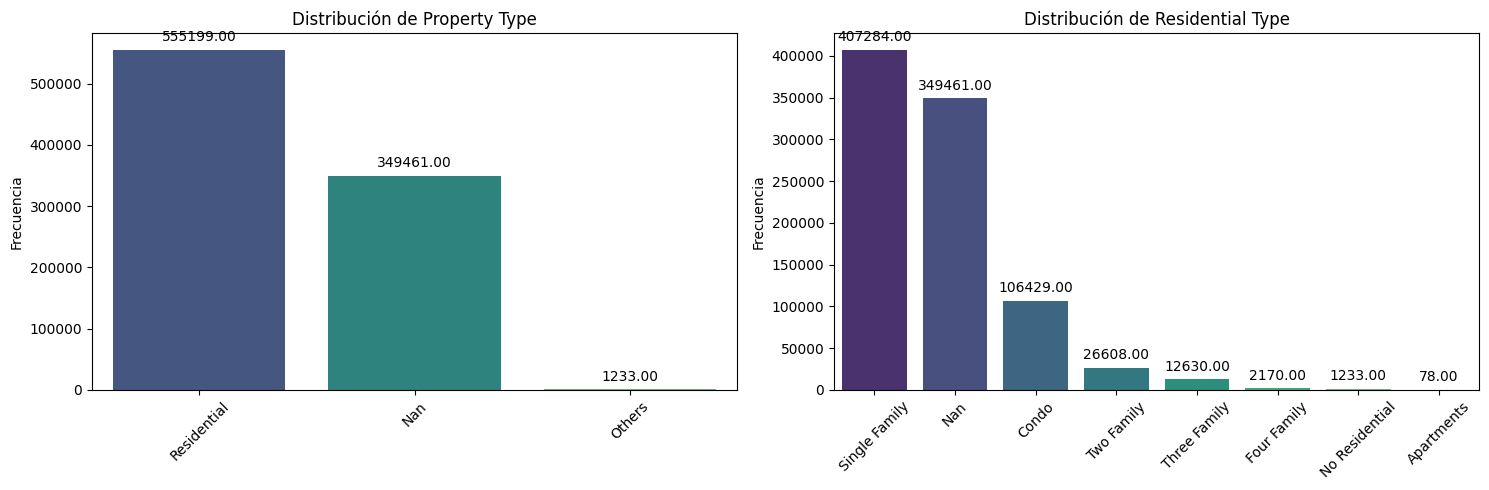

In [81]:
# El 61% de las transacciones corresponden a inmuebles residenciales, alcanzando las 555.000 ventas.
# Especialmente significativas son las viviendas unifamiliares que representan el 45% del total de transacciones, ascendiendo a un total de 407.284.
# Es importante destacar que del 39% de las transacciones no se conoce el tipo de propiedad objeto de las mismas.  
pinta_distribucion_categoricas(df_total, ["Property Type","Residential Type"], mostrar_valores= True)

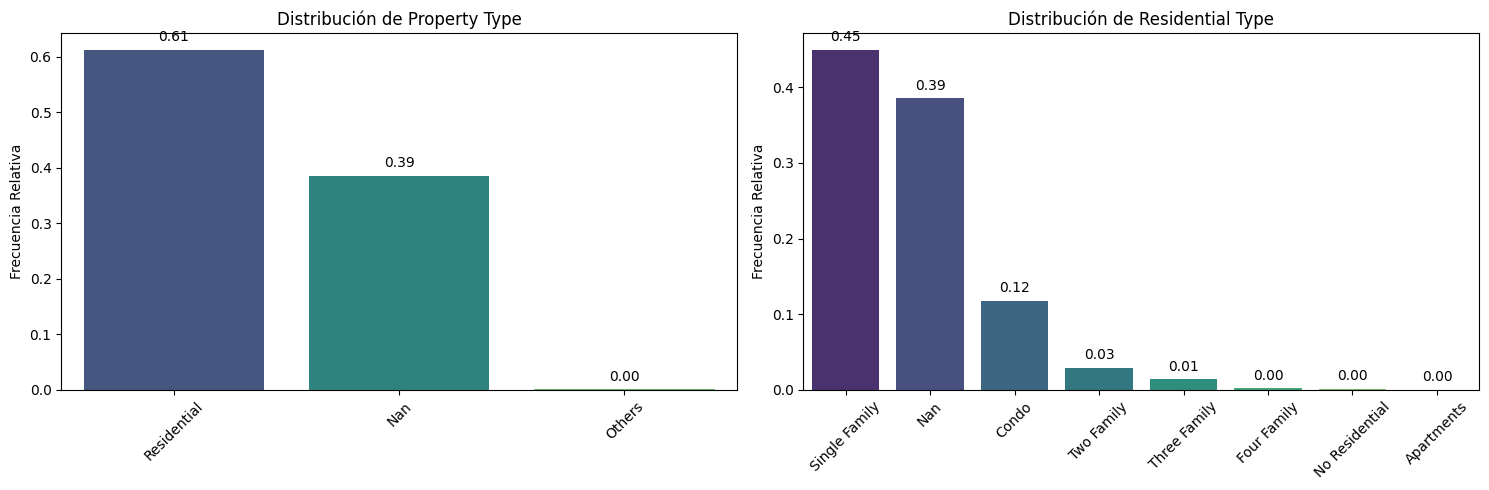

In [82]:
pinta_distribucion_categoricas(df_total, ["Property Type","Residential Type"], mostrar_valores= True, relativa = True)

#### Binarias: Before 2007 y Overpriced

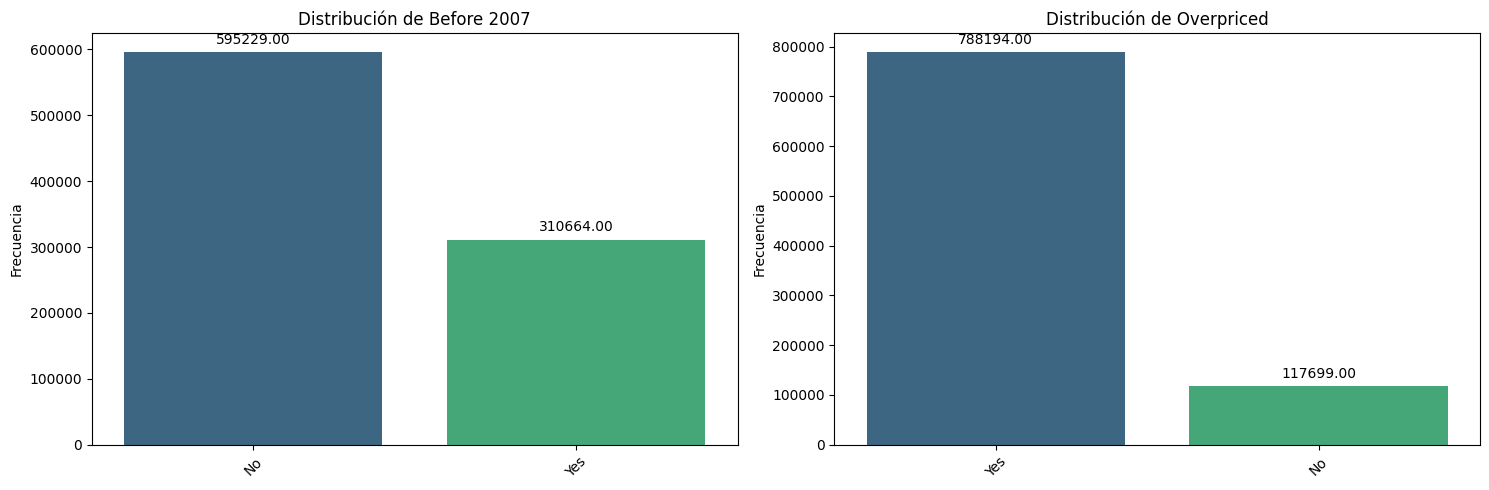

In [83]:
#Si analizamos la distribución de las fechas de transacciones, el 66% de las mismas se produjeron entre el 2007 y el 2020 (14 años de los 19 analizados, 70% del periodo temporal). Es decir 595.239 transacciones.
# En cuanto a la relación del precio con la valoración previa, un 87% de las transacciones se materializaron con precios por encima de su valoración, 788.204 inmuebles.
pinta_distribucion_categoricas(df_total,["Before 2007","Overpriced"], mostrar_valores= True)

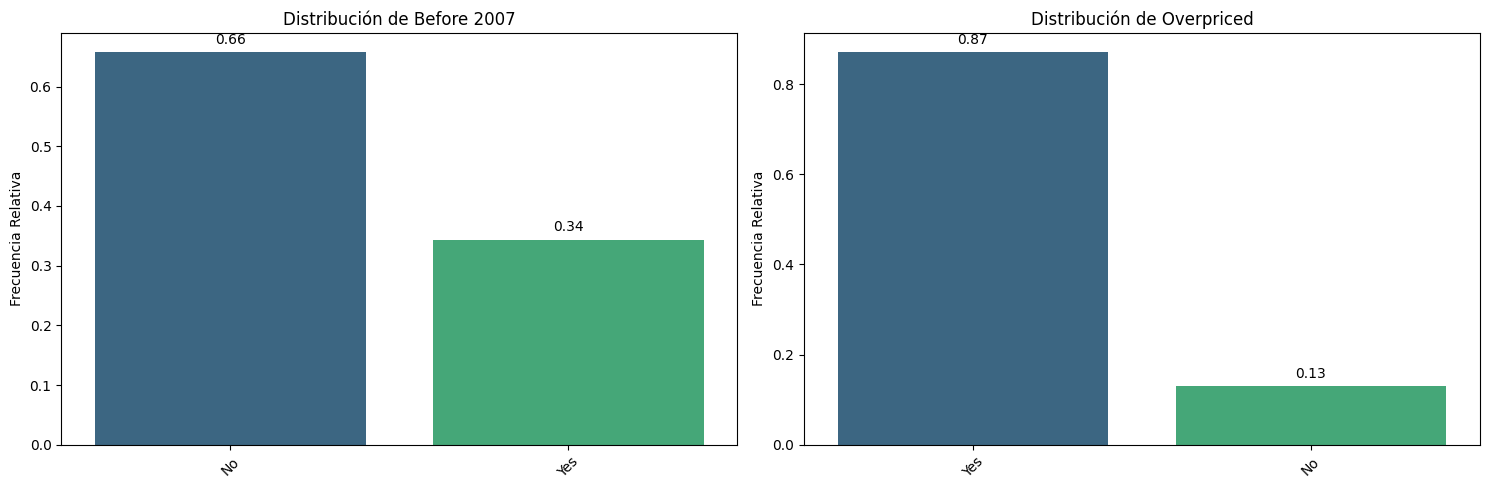

In [84]:
pinta_distribucion_categoricas(df_total,["Before 2007","Overpriced"], mostrar_valores= True,relativa=True)

#### Tipo de propiedad y Before 2007

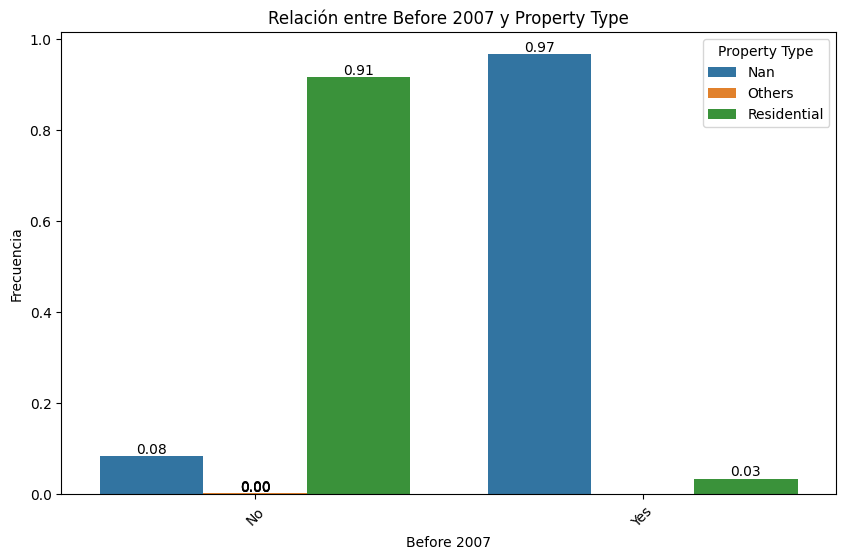

In [85]:
# La relación años (before 2007) y tipo de propiedad, es claramente dispar.
# Entre las transacciones realizadas antes del 2007 el 97% no fueron categorizadas mientras que a partir del 2007 ese porcentaje cae hasta el 8%. (hasta el el 91% de las transacciones correspondieron a El 86% de las transacciones no catalogadas correponden al periodo anterior a 2007.
# A partir del 2007, el 91% de las transacciones tuvieron como objeto una propiedad residencial, 544.547 transacciones de un total de 595.239.
plot_categorical_relationship_fin(df_total, "Before 2007","Property Type", show_values= True, relative_freq= True)

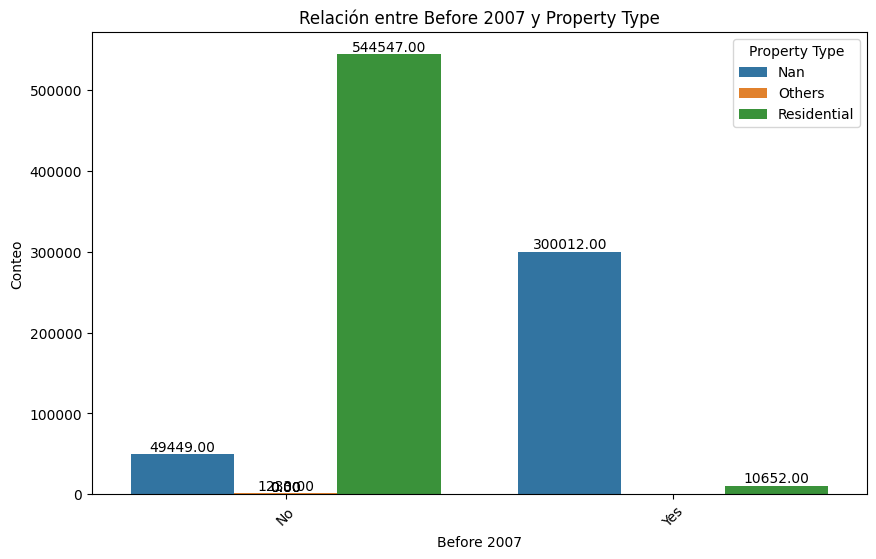

In [86]:
plot_categorical_relationship_fin(df_total, "Before 2007","Property Type", show_values= True)

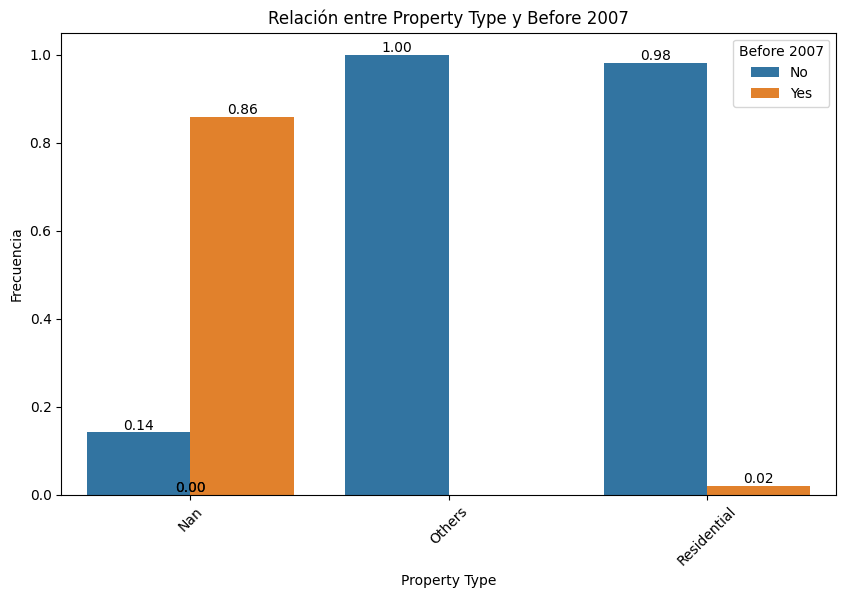

In [87]:
# Visto desde otra perspectiva:
# El 86% de las transacciones sin catalogar se sitúan en el primer periodo (2002-2006).
# Mientras que el 98% de las transacciones residenciales y el 100% de transacciones sabidas como "no residenciales" se realizaron a partir del 2007.  
plot_categorical_relationship_fin(df_total, "Property Type","Before 2007", show_values= True,relative_freq=True)

#### Before 2007 y Overpriced

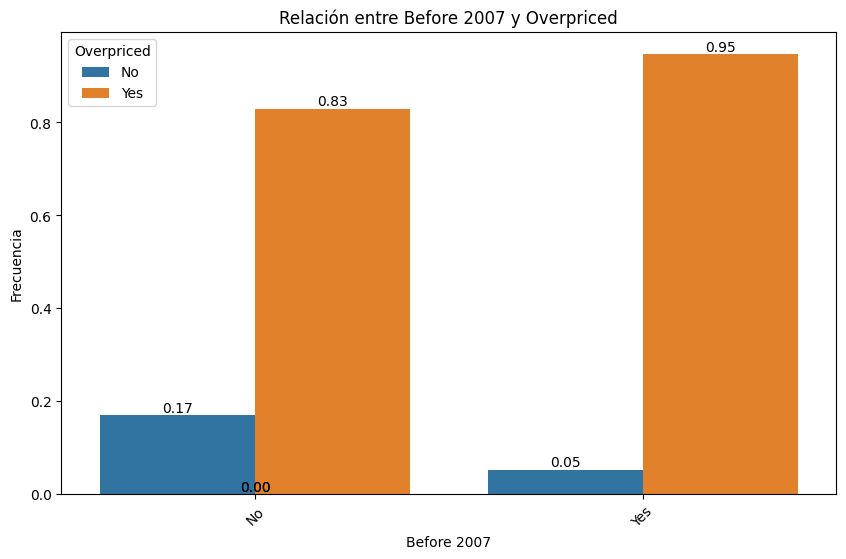

In [88]:
# De las transacciones previas a 2007, el 95% se han pagado por encima de su valoración (8 puntos porcentuales por encima de la media, 87% overpriced en todo el periodo).
# Ese porcentaje cae al 83% entre las transacciones realizadas entre 2007 y 2020 (4 puntos porcentuales por debajo de la media, 87%).
plot_categorical_relationship_fin(df_total, "Before 2007","Overpriced", show_values= True, relative_freq= True)

#### Tipo de propiedad y Overpriced

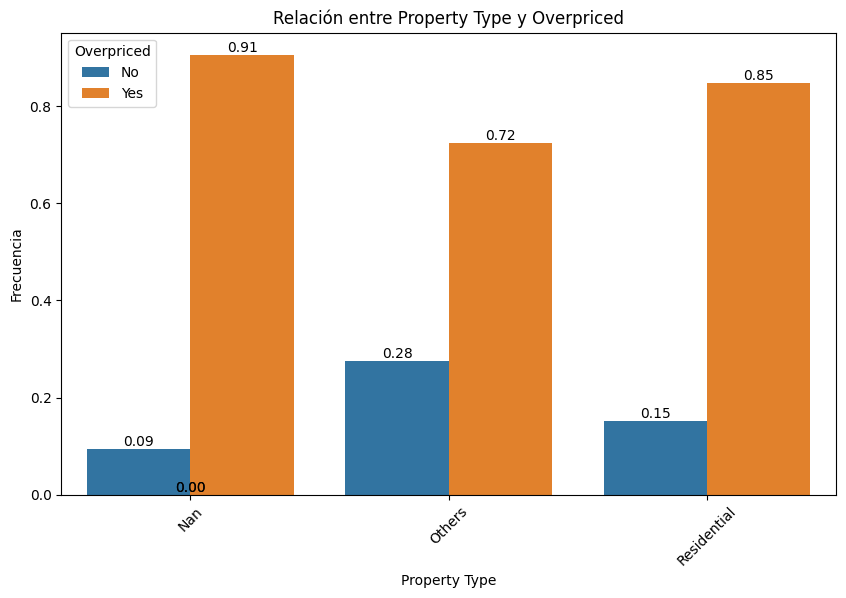

In [89]:
# Por tipo de propiedad, el 91% de las transacciones sin catalogar se pagaron por encima de valor.
# Esto tiene que ver con que en el periodo previo al 2007 las transacciones pagadas por encima de valor fueron significativamente superiores a las del siguiente periodo y que durante ese periodo previo al 2007 el 97% de las transacciones no se catalogaron.
# El 85% de las residencias se han pagado por encima de su valoración (vs. el 83% de media del periodo post 2006 en el que se registran el 98% de dichos inmuebles).
# Mientras que en el grupo Others decae al 72% (vs. el 83% de media del periodo post 2006 en el que se registran el 100% de dichos inmuebles).
plot_categorical_relationship_fin(df_total, "Property Type","Overpriced", show_values= True, relative_freq= True)

#### Price

(2,)


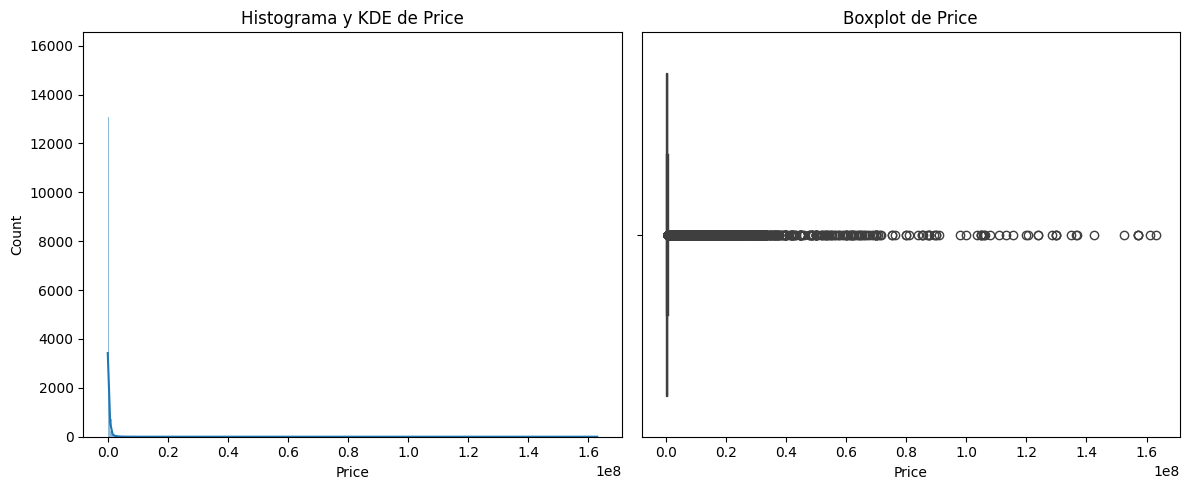

In [90]:
# El precio de las transacciones presenta claramente unos valores anómalos muy altos a analizar.
plot_combined_graphs(df_total,["Price"])

In [101]:
df_total["Price"].describe()

count    9.058930e+05
mean     3.779223e+05
std      1.297745e+06
min      3.000000e+02
25%      1.415000e+05
50%      2.250000e+05
75%      3.600000e+05
max      1.630000e+08
Name: Price, dtype: float64

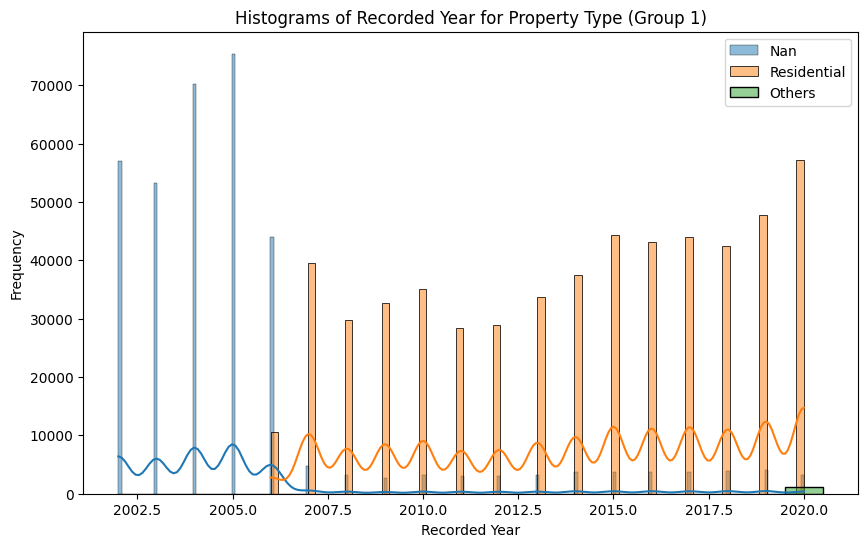

In [103]:
plot_grouped_histograms(df_total, "Property Type","Recorded Year", group_size= 3)

(2,)


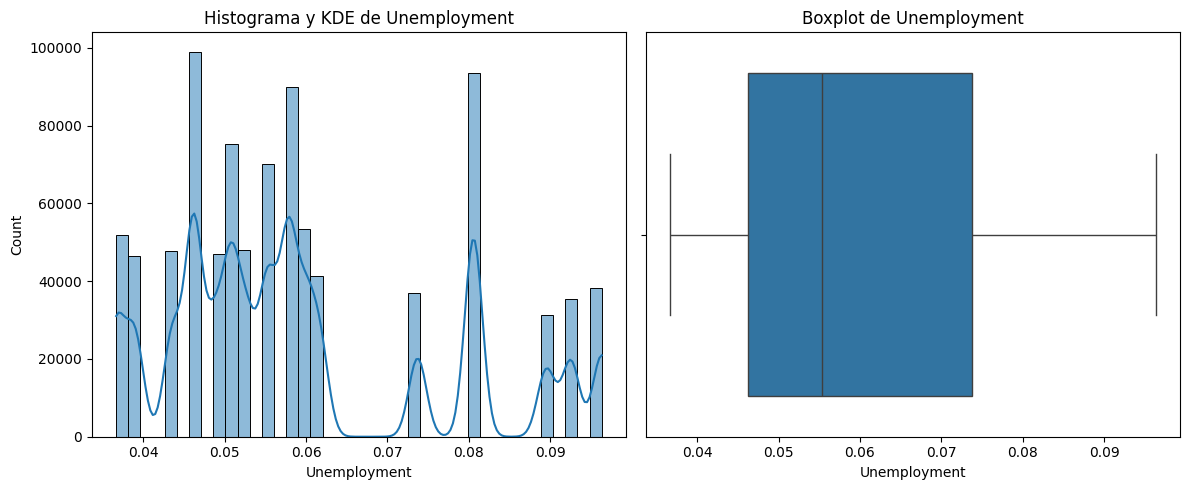

In [93]:
plot_combined_graphs(df_total, ["Unemployment"], whisker_width=2, bins = 40)

<Axes: xlabel='Recorded Year'>

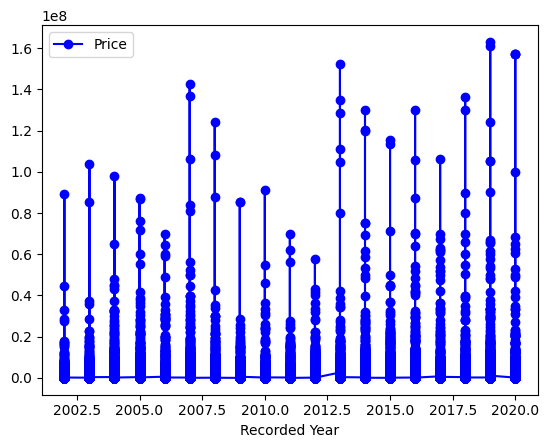

In [94]:
df_total.plot(x='Recorded Year', y='Price', marker='o', linestyle='-', color='b')

In [95]:
df_yearly_sales=pd.DataFrame(df_total.groupby("Recorded Year")["Date Recorded"].count())
df_yearly_price=pd.DataFrame(df_total.groupby("Recorded Year")["Price"].mean())
df_yearly_intrate=df_total.groupby("Recorded Year")["Interest Rate"].mean().round(4)*100
df_yearly_inflation=df_total.groupby("Recorded Year")["Inflation"].mean().round(4)*100
df_yearly_unemployment=df_total.groupby("Recorded Year")["Unemployment"].mean().round(4)*100

In [96]:
df_yearly=pd.merge(pd.merge(pd.merge(pd.merge(df_yearly_sales,df_yearly_price,how="left", on="Recorded Year"),df_yearly_intrate,how="left",on="Recorded Year"),df_yearly_inflation,how="left",on="Recorded Year"),df_yearly_unemployment,how="left",on="Recorded Year")
df_yearly

,Date Recorded,Price,Interest Rate,Inflation,Unemployment
Recorded Year,,,,,
2002,57057,262704.086230,1.68,1.59,5.78
2003,53304,308867.047032,1.11,2.27,5.99
2004,70254,343112.731844,1.38,2.68,5.53
2005,75397,384884.728000,3.20,3.39,5.08
2006,54652,379188.285351,4.98,3.23,4.62
2007,44414,481202.070257,5.08,2.85,4.62
2008,32941,416257.897119,2.03,3.84,5.78
2009,35428,325944.696737,0.00,-0.36,9.25
2010,38249,356575.654265,0.00,1.64,9.63


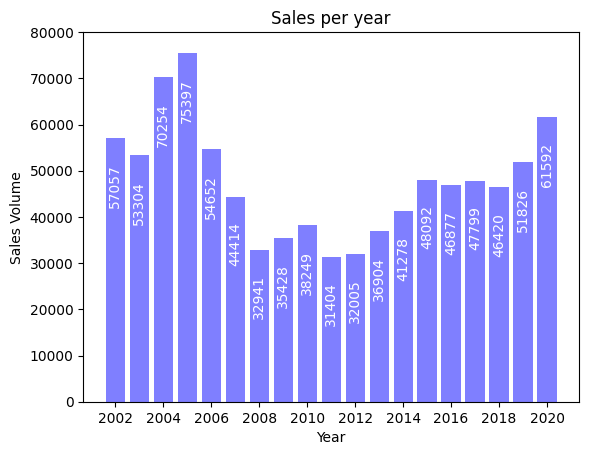

In [104]:
plt.figure()
bars=plt.bar(x= df_yearly.index, height= df_yearly["Date Recorded"], color = "b", alpha = 0.5)
plt.ylim([0,80000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 15000, f"{yval}", ha="center", va="bottom", rotation="vertical",color="white")
#plt.text(float(df_yearly["Date Recorded"]), float(df_yearly["Date Recorded"]) + 50,f"{df_yearly["Date Recorded"]}", ha = "center")
plt.title("Sales per year")
plt.show()

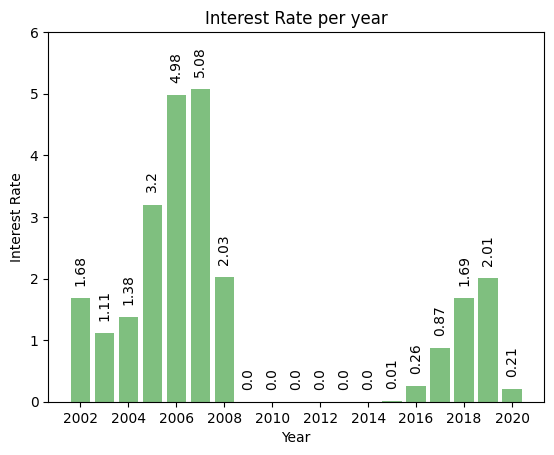

In [107]:
plt.figure()
bars=plt.bar(x= df_yearly.index, height= df_yearly["Interest Rate"], color = "g", alpha = 0.5)
plt.ylim([-0,6])
plt.ylabel("Interest Rate")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])
for bar in bars:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, f"{yval}", ha="center", va="bottom", rotation="vertical")
plt.title("Interest Rate per year")
plt.show()

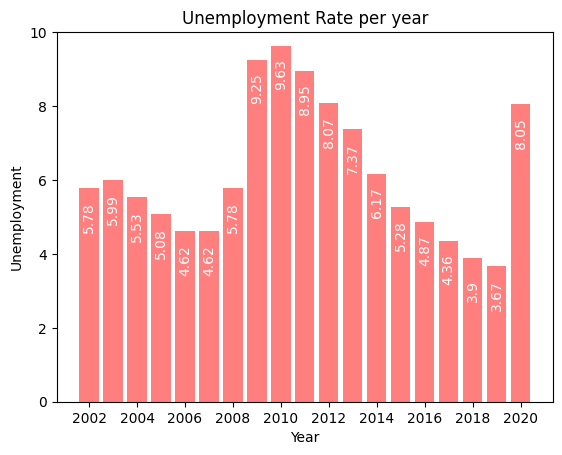

In [108]:
plt.figure()
bars=plt.bar(x= df_yearly.index, height= df_yearly["Unemployment"], color = "r", alpha = 0.5)
plt.ylim([0,10])
plt.ylabel("Unemployment")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])
for bar in bars:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 1.2, f"{yval}", ha="center", va="bottom", rotation="vertical",color="white")
plt.title("Unemployment Rate per year")
plt.show()

NameError: name 'labels' is not defined

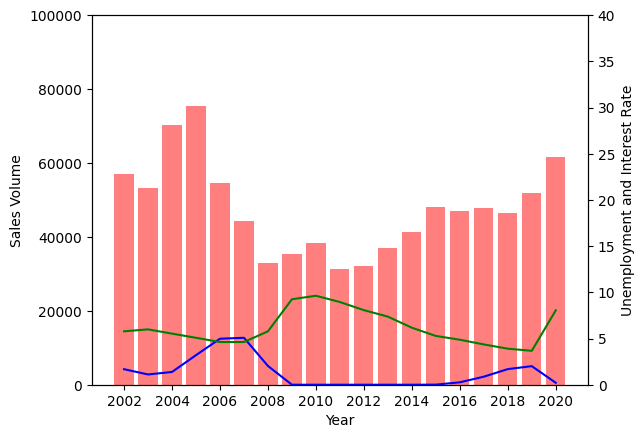

In [100]:
plt.figure()

bar1 = plt.bar(x=df_yearly.index, height=df_yearly["Date Recorded"], color="r", alpha=0.5, label="Sales Volume")
plt.ylim([0, 100000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])

ax2 = plt.twinx()
lines2 = ax2.plot(df_yearly.index, df_yearly["Interest Rate"], color="b", label="Interest Rate")
plt.ylim([0, 40])
ax2.set_ylabel("Unemployment and Interest Rate")

lines3 = ax2.plot(df_yearly.index, df_yearly["Unemployment"], color="g", label="Unemployment")



plt.legend(bars, labels, loc='upper left')

plt.title("Comparación de tres series de datos")
plt.show()

In [ ]:
plt.figure()

bar1 = plt.bar(x=df_yearly.index, height=df_yearly["Date Recorded"], color="r", alpha=0.5, label="Sales Volume")
plt.ylim([0, 100000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])

ax2 = plt.twinx()
line2 = ax2.plot(df_yearly.index, df_yearly["Interest Rate"], color="b", label="Interest Rate")
plt.ylim([0, 40])
ax2.set_ylabel("Unemployment and Interest Rate")

line3 = ax2.plot(df_yearly.index, df_yearly["Unemployment"], color="g", label="Unemployment")

for bar in bar1:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{yval}", ha="center", va="bottom", rotation="vertical")

for line in (line2 + line3):
    yval = line.get_ydata().round(2)
    plt.text(line.get_xdata() + line.get_xdata()[1] / 2, yval + 0.5, f"{yval[0]}", ha="center", va="bottom", rotation="vertical")

plt.legend(loc='upper left')

plt.title("Comparación de tres series de datos")
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 640x480 with 2 Axes>

In [ ]:
plt.figure()

bar1 = plt.bar(x=df_yearly.index, height=df_yearly["Date Recorded"], color="r", alpha=0.5, label="Sales Volume")
plt.ylim([0, 100000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])

ax2 = plt.twinx()
line2 = ax2.plot(df_yearly.index, df_yearly["Interest Rate"], color="b", label="Interest Rate")
plt.ylim([0, 40])
ax2.set_ylabel("Unemployment and Interest Rate")

line3 = ax2.plot(df_yearly.index, df_yearly["Unemployment"], color="g", label="Unemployment")

for bar in bar1:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{yval}", ha="center", va="bottom", rotation="vertical")

for line in (line2 + line3):
    yval = line.get_ydata()[0].round(2)
    plt.text(line.get_xdata() + line.get_xdata()[1] / 2, yval + 0.5, f"{yval}", ha="center", va="bottom", rotation="vertical")

plt.legend(loc='upper left')

plt.title("Comparación de tres series de datos")
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 640x480 with 2 Axes>